In [519]:
NUMBER_SAMPLE = 5000

In [211]:
# Update kaggle to be able to fully and correctly download the 5GB dataset
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
!mkdir data
!mkdir /root/.kaggle
!mv drive/MyDrive/deep_learning/kaggle.json /root/.kaggle/kaggle.json
!sudo chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [214]:
!kaggle competitions download -c humpback-whale-identification -p data

 28% 1.53G/5.51G [00:20<00:53, 79.2MB/s]
User cancelled operation
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/_monitor.py", line 44, in exit
    self.join()
  File "/usr/lib/python3.7/threading.py", line 1044, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.7/threading.py", line 1060, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt


In [215]:
!unzip data/humpback-whale-identification.zip

Archive:  data/humpback-whale-identification.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data/humpback-whale-identification.zip or
        data/humpback-whale-identification.zip.zip, and cannot find data/humpback-whale-identification.zip.ZIP, period.


In [216]:
!rm -rf data/humpback-whale-identification.zip

In [217]:
!rm -rf data

In [520]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [521]:
complete_train = pd.read_csv('train.csv')

sample_train = complete_train.head(NUMBER_SAMPLE)

In [522]:
# Reading the csv file for train dataset
train = sample_train

In [523]:
# The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, column data types,
# memory usage, range index, and the number of cells in each column (non-null values).
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   5000 non-null   object
 1   Id      5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [524]:
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
train.describe()

,Image,Id
count,5000,5000
unique,5000,1961
top,0000e88ab.jpg,new_whale
freq,1,1943


In [525]:
# shape gives number of rows and columns in a tuple
train.shape

(5000, 2)

In [526]:
# head funtion gives the first 5 rows of datasets
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [527]:
# tail funtion gives the last 5 rows of datasets
train.tail()

,Image,Id
4995,333dad83a.jpg,new_whale
4996,333dd71a9.jpg,new_whale
4997,333e5a851.jpg,new_whale
4998,33402fb91.jpg,w_c073f96
4999,3341fc105.jpg,w_4bbd0fd


In [528]:
# put labels into y_train variable
y_train = train['Id']
# Drop the 'Id' column
X_train = train.drop(labels = ['Id'], axis = 1)
y_train.head()

0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [529]:
# Look for empty values
train.isnull().sum()

Image    0
Id       0
dtype: int64

In [530]:
# importing the libraries for image preprocessing
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

In [531]:
def prepare_images(data, line_count, path):
    
    X_images = np.zeros((line_count, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img(path+'/'+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_images[count] = x
        if (count%500 == 0):
            print('Processing image: ', count+1, ", ", fig)
        count += 1
    
    return X_images

In [532]:
X_train = prepare_images(X_train, X_train.shape[0], 'train')

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg


In [533]:
X_train = X_train / 255.0 
# rescaling the dataset 
# dividing an image by 255 simply rescales the image from 0-255 to 0-1.
# (Converting it to float from int makes computation convenient too) 
print('X_train shape: ', X_train.shape)

X_train shape:  (5000, 100, 100, 3)


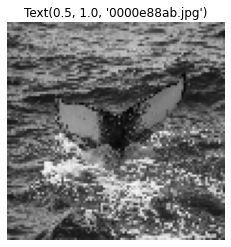

In [534]:
# Checking example input image
plt.imshow(X_train[0][:,:,0], cmap='gray')
plt.title(plt.title(train.iloc[0,0]))
plt.axis('off')
plt.show()

In [535]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [536]:
#Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)

In [537]:
# let's look at first 10 values
y_train[0:10]

array([1875, 1505,  248,    0,    0,    0, 1692,    0,  730, 1277])

In [538]:
# finding shape of y_train data
y_train.shape

(5000,)

In [539]:
y_train_class_count = len(set(y_train))
y_train_class_count

1961

In [540]:
# convert to one-hot-encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = y_train_class_count)

In [541]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [542]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [559]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation = 'softmax'))

In [544]:
#Provides the summary of model we created
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 100, 100, 16)      448       
                                                                 
 conv2d_211 (Conv2D)         (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 50, 50, 16)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_105 (Ba  (None, 50, 50, 16)       64        
 tchNormalization)                                               
                                                                 
 conv2d_212 (Conv2D)         (None, 50, 50, 32)        4640      
                                                                 
 conv2d_213 (Conv2D)         (None, 50, 50, 32)      

In [560]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [561]:
# Set a learning rate scheduler
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

In [547]:
import tensorflow as tf

class LogCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('\n\nTrain Loss = {}\nValidation Loss = {}\nEpoch =  {}\n'.format(logs['loss'], logs['val_loss'], epoch))

In [562]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [563]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images horizontally
        vertical_flip=False, # randomly flip images vertically
        validation_split=0.3)  


datagen.fit(X_train)

In [564]:
# epochs = 50  # for better result increase the number of epochs
batch_size = 64

In [565]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='train',
    x_col='Image',
    y_col='Id',
    target_size=(100, 100),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical') # set as training data

validation_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='train',
    x_col='Image',
    y_col='Id',
    target_size=(100, 100),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical') # set as validation data

Found 3500 validated image filenames belonging to 1961 classes.
Found 1500 validated image filenames belonging to 1961 classes.


In [261]:
model_history = model.fit(x_train, y_train, epochs=40, validation_split=0.3, callbacks=[learning_rate_reduction])

Epoch 1/40
219/219 [==============================] - 7s 26ms/step - loss: 7.0291 - accuracy: 0.2800 - val_loss: 11.0858 - val_accuracy: 0.0010 - lr: 0.0010
Epoch 2/40
219/219 [==============================] - 5s 21ms/step - loss: 5.3166 - accuracy: 0.3759 - val_loss: 6.4964 - val_accuracy: 0.3607 - lr: 0.0010
Epoch 3/40
219/219 [==============================] - 5s 21ms/step - loss: 4.7076 - accuracy: 0.3840 - val_loss: 6.8947 - val_accuracy: 0.3590 - lr: 0.0010
Epoch 4/40
219/219 [==============================] - 5s 21ms/step - loss: 4.1417 - accuracy: 0.3841 - val_loss: 6.8973 - val_accuracy: 0.3620 - lr: 0.0010
Epoch 5/40
219/219 [==============================] - 5s 21ms/step - loss: 3.5139 - accuracy: 0.3926 - val_loss: 7.2103 - val_accuracy: 0.3457 - lr: 0.0010
Epoch 6/40
219/219 [==============================] - 5s 24ms/step - loss: 2.8240 - accuracy: 0.4330 - val_loss: 7.4187 - val_accuracy: 0.3293 - lr: 0.0010
Epoch 7/40
219/219 [==============================] - 5s 22ms/s

In [370]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 100, 100, 16)      448       
                                                                 
 conv2d_157 (Conv2D)         (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_78 (Bat  (None, 50, 50, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_158 (Conv2D)         (None, 50, 50, 32)        4640      
                                                                 
 conv2d_159 (Conv2D)         (None, 50, 50, 32)      

In [566]:
history = model.fit_generator(train_generator,
                              epochs=10, verbose = 2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction],
                              validation_data=validation_generator)

Epoch 1/10
111/111 - 50s - loss: 7.0909 - accuracy: 0.2157 - val_loss: 7.2368 - val_accuracy: 0.2713 - lr: 0.0010 - 50s/epoch - 451ms/step


In [558]:
len(train_generator), len(validation_generator)

(55, 24)

In [567]:
(X_train.shape[0] // batch_size) * 10 # Augmenter le batch size

1110

In [ ]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label='Train Loss')
plt.title('Train Loss')
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label='Train Accuracy')
plt.title('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# finding the training accuracy 
print('Train accuracy of the model: ', history.history['acc'][-1])

In [ ]:
# finding the training loss 
print('Train loss of the model: ',history.history['loss'][-1])